<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd # импортируем библиотеку pandas
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib
import numpy as np # импортируем библиотеку numpy

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv') # загружаем данные из файла в датафрейм
data.head() # выводим его первые строки

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Видим, что исходные данные не разбиты по колонкам

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t") # разделяем колонки
data.head() # снова выводим первые строки таблицы, чтобы увидеть результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info() # выводим общую информацию о полученном датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Датафрейм содержит 23 699 записей (22 столбца), при этом в ряде столбцов (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition) значения пропущены.
При этом следует отметить, что формат значений в отдельных столбцах не соответствует требуемому: например, first_day_exposition (дата публикации) - object вместо datetime64, floors_total (всего этажей в доме) - float64 вместо int64, is_apartment (апартаменты) - object вместо bool, balcony (число балконов) - float64 вместо int64, parks_around3000 (число парков в радиусе 3 км) - float64 вместо int64, ponds_around3000 (число водоёмов в радиусе 3 км) - float64 вместо int64, days_exposition (сколько дней было размещено объявление) - float64 вместо int64.
Кроме того, некоторые столбцы лучше переименовать (cityCenters_nearest, parks_around3000, ponds_around3000).

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

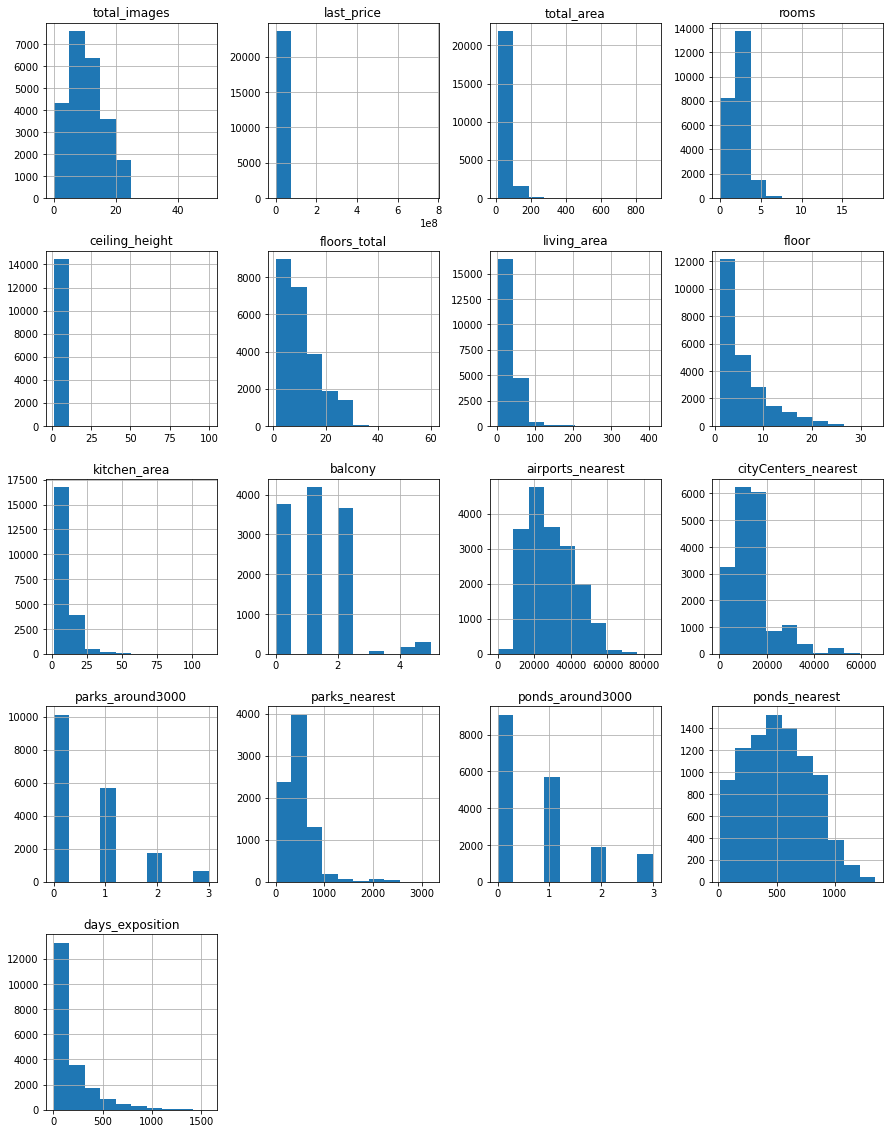

In [5]:
data.hist(figsize=(15, 20)) # строим общую гистограмму для всех числовых столбцов таблицы

На гистограммах уже видим возможные аномалии (например, столбцы last_price, balcony).

### Предобработка данных

**2.1 Поиск и изучение пропущенных значений в столбцах**

In [6]:
data.isna().sum() # определяем, в каких столбцах есть пропуски, а также их количество

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data['balcony'] = data['balcony'].fillna(0) # если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски заменяем на 0.
data['balcony'] = data['balcony'].astype(int) # меняем тип данных в столбце на int64 (количество балконов может быть только целым числом).
data['is_apartment'] = data['is_apartment'].astype(bool) # меняем тип данных в столбце на bool (недвижимость либо является апартаментами, либо нет).
data['is_apartment'] = data['is_apartment'].fillna(False) # если продавец не указал, является ли недвижимость апартаментами, то, скорее всего, не является. Такие пропуски заменяем на False.
data['parks_around3000'] = data['parks_around3000'].fillna(0) # если продавец не указал число парков поблизости (либо количество не "подтянулось" автоматически), то, скорее всего, их нет. Такие пропуски заменяем на 0.
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # если продавец не указал число водоемов поблизости (либо количество не "подтянулось" автоматически), то, скорее всего, их нет. Такие пропуски заменяем на 0.
data['parks_around3000'] = data['parks_around3000'].astype(int) # меняем тип данных в столбце на int64 (количество парков может быть только целым числом).
data['ponds_around3000'] = data['ponds_around3000'].astype(int) # меняем тип данных в столбце на int64 (количество водоемов может быть только целым числом).

Отметим, что количество пропусков в столбце parks_around3000 и столбце ponds_around3000 идентично - скорее всего, пропуски в этих столбцах присутствуют по одним и тем же объектам (соответствующие объекты находятся вдали от парков и водоемов).

In [8]:
data = data.dropna(subset=['locality_name']) # удалим 49 квартир с пропущенными сведения о населенном пункте (данная информация слишком существенна для анализа)

In [9]:
data = data.dropna(subset=['floors_total']) # удалим 86 квартир с пропущенными сведения об этажности дома (данная информация слишком существенна для анализа)

In [10]:
no_kitchen = data[data['kitchen_area'].isnull()]
no_kitchen['is_apartment'].value_counts() 

True     2050
False     172
Name: is_apartment, dtype: int64

Видим, что большинство квартир "без кухни" является апартаментами.

In [11]:
no_kitchen['open_plan'].value_counts()

False    2155
True       67
Name: open_plan, dtype: int64

Видим, что квартир со свободной планировкой с пропущенной площадью кухни немного.

In [12]:
no_living = data[data['living_area'].isnull()]
no_living['is_apartment'].value_counts()

True     1755
False     110
Name: is_apartment, dtype: int64

Видим, что большинство квартир "без жилой площади" является апартаментами.

In [13]:
no_living['open_plan'].value_counts()

False    1860
True        5
Name: open_plan, dtype: int64

Видим, что квартир со свободной планировкой с пропущенной жилой площадью очень мало.

In [14]:
avg_total = data.loc[(~data['living_area'].isna()), 'total_area'].mean()
avg_living = data.loc[(~data['living_area'].isna()), 'living_area'].mean()
ratio_1 = avg_total / avg_living
data['living_area'] = data['living_area'].fillna(data['total_area'] / ratio_1) # заменим пропуски в столбце living_area на приблизительное вероятное значение, рассчитанное с помощью коэффициента (получен на основе выборки квартир без пропусков в данном столбце с использованием средних значений площади)

In [15]:
avg_total_1 = data.loc[(~data['kitchen_area'].isna()), 'total_area'].mean()
avg_kitchen = data.loc[(~data['kitchen_area'].isna()), 'kitchen_area'].mean()
ratio_2 = avg_total_1 / avg_kitchen
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / ratio_2) # заменим пропуски в столбце kitchen_area на приблизительное вероятное значение, рассчитанное с помощью коэффициента (получен на основе выборки квартир без пропусков в данном столбце с использованием средних значений площади)

Количество пропусков в столбце ceiling_height слишком велико (почти 40% выборки) - целесообразнее оставить их как есть, чтобы не исказить статистики выборки и результаты анализа.

**2.2 Причины пропусков в данных**

По всей видимости, по ряду объектов картографические данные (расстояние до центра города, аэропорта и ближайшего водоема/парка) отсутствуют вследствие технической ошибки (данные сведения не вносятся пользователями). Данные о расстоянии до центра города могут отсутствовать в отношении объектов, находящихся в небольших населенных пунктах. Можно предположить, что название населённого пункта также не "подтянулось" в базу из общего справочника из-за технического сбоя.
Ряд данных, которые должны были быть внесены пользователями, также отсутствует по отдельным объектам: ceiling_height (высота потолков), floors_total (всего этажей в доме), living_area (жилая площадь в квадратных метрах), kitchen_area (площадь кухни).
Указанное, возможно, обусловлено человеческим фактором (пользователи забыли заполнить соответствующие ячейки) либо тем, что параметры не были известны пользователям либо они посчитали эти сведения несущественными.
Стоит отметить, что в отдельных случаях данные о kitchen_area могли отсутствовать из-за отсутствия отдельной кухни в квартире (апартаменты, свободная планировка).
Кол-во дней, в течение которых было размещено объявление, отсуствует по причине того, что на момент среза объявление еще не было снято.

**2.3 Меняем типы данных в иных столбцах**

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M') # меняет формат данных в столбце на datetime64 (так как это дата) и избавляемся от нулевых значений часа/минуты/секунды.  
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'}) # приводим в порядок названия некоторых столбцов

Формат данных в столбцах floors_total и days_exposition поменять на int64 невозможно, так как в них есть пропуски, которые в соответствии с инструкцией по выполнению проекта нужно оставить (логичную замену предложить невозможно).

**2.4 Устраняем неявные дубликаты в столбце с названиями**

In [17]:
print(data.duplicated().sum()) # проверим, нет ли явных дубликатов

0


In [18]:
print(data['locality_name'].unique()) # изучаем уникальные значения в столбце с названиями населенных пунктов
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок станции')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
# устраняем неявные дубликаты

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

**2.5 Устраняем редкие и выбивающиеся значения (аномалии) во всех столбцах**

count    23565.000000
mean         9.878421
std          5.681156
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


<AxesSubplot:>

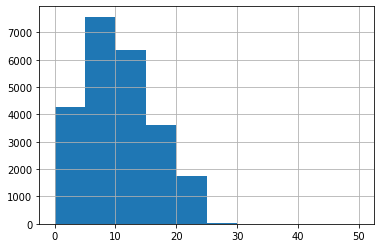

In [19]:
print(data['total_images'].describe()) # получаем характеристики, дающие представление о выборке
data['total_images'].hist() # строим гистограмму

В отношении количества фотографий ничего необычного не выявлено (есть объявления без фотографий).

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


<AxesSubplot:>

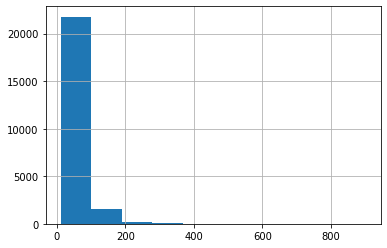

In [20]:
print(data['total_area'].describe()) # получаем характеристики, дающие представление о выборке
data['total_area'].hist() # строим гистограмму

Настораживают объекты общей площадью 12 кв м и 900 кв м.

In [21]:
display(data.query('total_area == 12')) # получаем строку с объектом площадью 12 кв м.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5.0,10.0,2,True,...,2.087561,0,Санкт-Петербург,21314.0,964.0,1,886.0,2,45.0,200.0


Учитывая, что это апартаменты - похоже на правду.

In [22]:
display(data.query('total_area == 900'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,True,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


Учитывая сочетание остальных параметров - похоже на правду.

In [23]:
print(data['last_price'].describe()) # получаем характеристики 
data['last_price'].head() # выводим несколько значений

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


0    13000000.0
1     3350000.0
2     5196000.0
3    64900000.0
4    10000000.0
Name: last_price, dtype: float64

Функция выводит данные в странном формате (числа слишком длинные). Видим, что в таблице данные отображаются нормально.

In [24]:
data['last_price'].max()

763000000.0

Получили самую высокую цену в выборке - 763 млн руб.

In [25]:
display(data.query('last_price > 100000000 and total_area < 120'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Видим, что дорогих квартир площадью менее 120 кв. м в базе нет.

In [26]:
data['last_price'].min() 

12190.0

Получили самую низкую цену в выборке - она подозрительно невысокая.

In [27]:
display(data.query('last_price < 500000')) # отбираем квартиры стоимостью до 500 тыс. руб.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31,2,NaN,1.0,23.000000,1,True,...,5.800000,0,поселок городского типа Будогощь,NaN,NaN,0,NaN,0,NaN,233.0
6859,6,490000.0,40.0,2017-12-11,1,NaN,5.0,22.946366,3,True,...,6.958537,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,43.0
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.000000,25,True,...,40.500000,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0
9581,7,450000.0,43.4,2018-08-31,2,NaN,5.0,30.300000,3,True,...,5.500000,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,96.0
10782,3,490000.0,29.1,2016-05-05,1,2.50,5.0,17.000000,5,True,...,5.500000,0,Сланцы,NaN,NaN,0,NaN,0,NaN,719.0
14911,5,430000.0,54.0,2018-06-26,2,NaN,3.0,30.977594,3,True,...,9.394025,0,поселок станции Свирь,NaN,NaN,0,NaN,0,NaN,44.0
16032,8,480000.0,32.0,2019-01-06,1,NaN,2.0,16.000000,1,True,...,5.566830,0,Сланцы,NaN,NaN,0,NaN,0,NaN,83.0
16219,14,450000.0,38.5,2018-07-11,2,2.65,2.0,22.085877,1,True,...,6.697592,0,деревня Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45.0
16274,18,440000.0,40.0,2018-07-10,1,NaN,5.0,22.946366,1,True,...,6.958537,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.0
17456,7,430000.0,30.4,2019-04-22,1,NaN,2.0,16.000000,1,True,...,6.000000,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN


Стоимость двухкомнатной квартиры в Санкт-Петербурге площадью 109 кв. м в размере 12 190 руб. очевидно ошибочная.
Вероятно, она стоит 12 190 000 руб. Остальные объекты гораздо меньше по площади, стоят все-таки дороже и находятся в небольших населенных пунктах Ленинградской области.

In [28]:
rows_12 = (data['last_price'] == 12190.0)
data.loc[rows_12, "last_price"] = 12190000.0 # меняем стоимость квартиры

<AxesSubplot:>

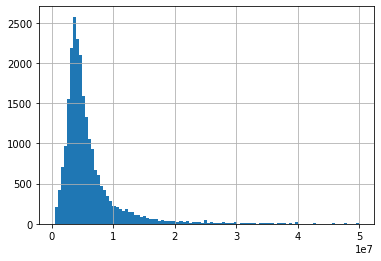

In [29]:
data['last_price'].hist(bins=100, range=(500000, 50000000)) # строим гистограмму

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


<AxesSubplot:>

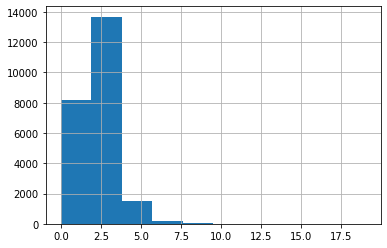

In [30]:
print(data['rooms'].describe()) # получаем характеристики
data['rooms'].hist() # строим гистограмму

0 комнат и 19 комнат вызывают сомнения.

In [31]:
display(data.query('rooms == 0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.500000,2,True,...,4.697013,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.000000,1,True,...,4.349086,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.750000,4,True,...,4.716148,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.300000,19,True,...,5.984342,1,поселок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,14.341479,7,True,...,4.349086,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.000000,16,True,...,4.523049,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.000000,4,True,...,4.818787,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,14.915138,8,True,...,4.523049,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.000000,8,True,...,5.044939,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.0


Квартир с 0 комнат у нас в выборке довольно много (194 или почти 1%). Надо разобраться.

In [32]:
rooms_0 = data.query('rooms == 0')
rooms_0.query('total_area <= 45')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.500000,2,True,...,4.697013,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.000000,1,True,...,4.349086,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.750000,4,True,...,4.716148,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.300000,19,True,...,5.984342,1,поселок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,14.341479,7,True,...,4.349086,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.000000,16,True,...,4.523049,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.000000,4,True,...,4.818787,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,14.915138,8,True,...,4.523049,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.000000,8,True,...,5.044939,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.0


Общая площадь 189 из 194 квартир без комнат не превышает 45 кв м - возможно заменить значение 0 на 1 (скорее всего это однушки-студии со свободной планировкой).

In [33]:
rows = (data['rooms'] == 0) & (data['total_area'] <= 45)
data.loc[rows, "rooms"] = 1 # делаем "однокомнатными" квартиры площадью не более 45 кв м

In [34]:
rooms_0.query('total_area > 45')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3458,6,7400000.0,73.6,2017-05-18,0,NaN,3.0,50.000000,1,True,...,12.803708,0,Санкт-Петербург,26581.0,6085.0,0,NaN,1,348.0,60.0
13613,16,8100000.0,58.4,2019-04-26,0,3.30,7.0,33.000000,6,True,...,10.159464,0,Санкт-Петербург,14509.0,8288.0,0,NaN,0,NaN,NaN
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7.0,212.827545,6,True,...,64.540431,0,Санкт-Петербург,25257.0,6060.0,1,761.0,1,584.0,90.0
20082,10,16300000.0,98.4,2017-11-08,0,3.10,5.0,60.500000,2,True,...,17.118001,0,Санкт-Петербург,26972.0,5819.0,0,NaN,1,674.0,537.0
21227,0,8200000.0,71.0,2017-07-21,0,5.80,5.0,68.000000,5,True,...,12.351403,0,Санкт-Петербург,20170.0,1261.0,2,295.0,3,366.0,30.0


5 апартаментов площадью от 58,4 кв м до 371 кв м вряд ли являются однокомнатными, логичную замену нулю предположить затруднительно.

In [35]:
data = data[(data['rooms'] != 0) | (data['total_area'] < 45)] # убираем строки с 'большими' квартирами без комнат (5 квартир - несущественное для выборки количество)

In [36]:
display(data.query('rooms > 10'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,True,...,13.3,0,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,True,...,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,True,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,True,...,11.9,0,Санкт-Петербург,21469.0,1015.0,1,686.0,2,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,True,...,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,True,...,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,NaN,1365.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,True,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
20829,6,28659000.0,245.4,2016-03-31,14,NaN,4.0,168.3,2,True,...,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95.0


Видим, что площадь квартир с количеством комнат от 10 не меньше 183,7 кв. м. Цена тоже соответствующая.

count    14477.000000
mean         2.770959
std          1.261878
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

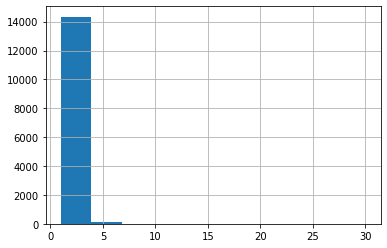

In [37]:
print(data['ceiling_height'].describe()) # выводим характеристики
data['ceiling_height'].hist(bins=10, range=(1,30)) # строим гистограмму

Видим, что в базе есть квартиры с гигантскими потолками до 100 метров - похоже на ошибку.
Также видим, что в базе есть квартиры с аномально низкими потолками (1 м как минимум).

In [38]:
display(data.query('ceiling_height > 10'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,9.602781,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,True,...,8.000000,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,True,...,7.000000,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,1,27.0,25.0,17.0,17,True,...,4.349086,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.500000,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,True,...,9.000000,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,True,...,7.000000,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,True,...,12.000000,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,True,...,5.700000,0,Кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,True,...,5.200000,0,Санкт-Петербург,11647.0,13581.0,0,NaN,0,NaN,NaN


Квартир с аномально большими потолками в базе 25.
Потолки высотой 22,6 м и выше возможно заменить на значения, разделенные на 10 (скорее всего, высота этих потолков 2,26 м и т.д.). Однако, чем заменить значения 10,3, 14, 20 и 100 м - неясно. Целесообразно их удалить.

In [39]:
data = data[(data['ceiling_height'] != 10.3) & (data['ceiling_height'] != 14) & (data['ceiling_height'] != 20) & (data['ceiling_height'] != 100)] # убираем строки с аномально высокими потолками (4 квартиры - несущественное для выборки количество)

In [40]:
rows_1 = (data['ceiling_height'] > 10)
data.loc[rows_1, "ceiling_height"] = data.loc[rows_1, "ceiling_height"] / 10 # делим значения высоты потолков больше 10 м на 10, чтобы привести их к реальным

In [41]:
display(data.query('ceiling_height < 2'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,True,...,5.20,0,поселок городского типа Мга,NaN,NaN,0,NaN,0,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,True,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,True,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13.0


В базе обнаружены 3 квартиры с аномально низким потолком (менее 2 м). Целесообразно их удалить из базы.

In [42]:
data = data[(data['ceiling_height'] != 1) & (data['ceiling_height'] != 1.20) & (data['ceiling_height'] != 1.75)]  # удаляем 3 объекта с высотой потолка менее 2 м

count    23553.000000
mean        10.675795
std          6.593181
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

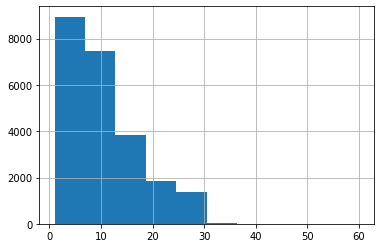

In [43]:
print(data['floors_total'].describe()) # получаем характеристики столбца
data['floors_total'].hist() # строим гистограмму

В базе данных присутствуют здания с количеством этажей от 1 до 60 - похоже на правду.

count    23553.000000
mean        34.596186
std         22.357128
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


<AxesSubplot:>

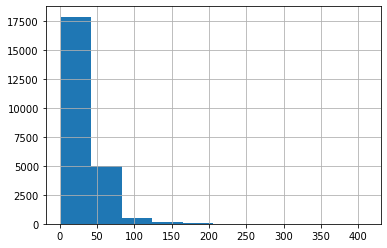

In [44]:
print(data['living_area'].describe()) # получаем характеристики столбца
data['living_area'].hist() # строим гистограмму

Вызывает вопросы минимальное значение жилой площади (2 кв м), максимальное тоже можно проверить (409 кв м).

In [45]:
display(data.query('living_area < 10 and total_area > 40'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
680,14,7200000.0,43.0,2017-10-31,1,NaN,8.0,9.0,2,True,...,23.0,0,Санкт-Петербург,23900.0,5232.0,1,2137.0,1,933.0,296.0
1326,8,8100000.0,52.0,2017-01-29,2,2.70,25.0,9.0,15,True,...,32.0,2,Санкт-Петербург,35555.0,15561.0,0,NaN,1,1180.0,337.0
2309,10,4200000.0,62.4,2017-06-15,2,2.60,9.0,8.4,6,True,...,41.0,2,поселок Шушары,23662.0,29448.0,0,NaN,0,NaN,111.0
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17.0,3.0,17,True,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0
8325,9,4800000.0,52.0,2017-10-25,2,NaN,5.0,9.0,2,True,...,6.0,1,Санкт-Петербург,33358.0,13171.0,0,NaN,2,118.0,119.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6.0,2.0,2,True,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0
20994,7,8900000.0,50.6,2018-10-22,2,2.50,7.0,8.0,3,True,...,31.0,0,Санкт-Петербург,12771.0,8301.0,1,173.0,3,126.0,NaN
21908,9,5300000.0,46.3,2018-03-20,1,2.75,7.0,9.8,3,True,...,26.0,0,Сестрорецк,55422.0,32352.0,0,NaN,1,1144.0,36.0
21943,15,6100000.0,77.6,2019-02-28,4,2.50,9.0,5.4,1,True,...,9.8,0,Санкт-Петербург,29338.0,11270.0,1,584.0,0,NaN,33.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8.0,3.0,8,True,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,280.0


Выборка квартир с жилой площадью менее 10 кв. м и общей площадью более 40 кв. м вызывает вопросы - эти данные не бьются с показателями общей площади квартиры в совокупности с площадью кухни и количеством комнат: например, в выборке есть трехкомнатная квартира общей плащадью 139 кв. м с кухней площадью 16 кв. м и жилой площадью 3 кв. м. По отдельным объектам значения площади кухни и жилой площади возможно перепутаны местами (например, мы видим двухкомнатную квартиру с кухней площадью 41 кв. м и жилой площадью 8,4 кв. м), в ряде случаев возможно указано 2.0 вместо 20, например. В целом природа данной аномалии непонятна.

In [46]:
data = data[~(data['living_area'] < 10) | ~(data['total_area'] > 40)] # удаляем из базы 10 квартир с жилой площадью менее 10 кв. м и общей площадью более 40 кв. м

In [47]:
display(data.query('living_area > 300'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.500000,4,True,...,26.4,0,Санкт-Петербург,23079.0,945.0,3,461.0,3,22.0,391.0
3117,19,140000000.0,631.0,2019-03-30,7,NaN,5.0,361.978925,5,True,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
4237,1,50000000.0,517.0,2017-10-14,7,NaN,4.0,332.000000,3,True,...,22.0,0,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.000000,3,True,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.500000,7,True,...,45.5,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7.0,347.500000,7,True,...,25.0,0,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,14.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.300000,4,True,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.700000,25,True,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


Учитывая остальные параметры, похоже на правду.

count    23543.000000
mean         5.878053
std          4.871525
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


<AxesSubplot:>

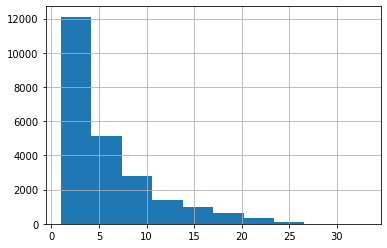

In [48]:
print(data['floor'].describe()) # получаем характеристики столбца
data['floor'].hist() # строим гистограмму

В части этажа, на котором находится квартира, аномалий не выявлено (минимальный - 1-й, максимальный - 33-й).

count    23543.000000
mean        10.487408
std          6.017435
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

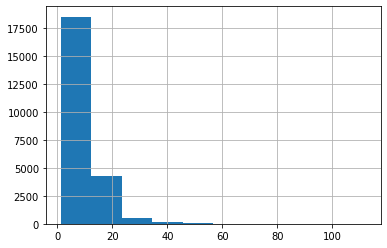

In [49]:
print(data['kitchen_area'].describe()) 
data['kitchen_area'].hist()

Надо проверить слишком малые и большие значения площади кухни.

In [50]:
print(data.query('kitchen_area > 50 and total_area < 100'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


Маленьких квартир с аномально большой кухней не обнаружено.

In [51]:
display(data.query('kitchen_area < 3'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
716,5,1500000.0,17.00,2017-06-07,1,2.70,9.0,12.000000,1,True,...,2.957378,0,поселок Шушары,18654.0,29846.0,0,NaN,0,NaN,40.0
906,15,2600000.0,27.00,2017-07-10,1,2.75,23.0,18.000000,18,True,...,2.000000,0,Санкт-Петербург,22131.0,17459.0,0,NaN,1,411.0,10.0
6262,9,3100000.0,24.00,2018-06-25,2,3.00,5.0,16.000000,5,True,...,2.000000,0,Санкт-Петербург,31960.0,4914.0,2,426.0,1,936.0,54.0
7950,3,5967734.0,66.40,2017-02-07,2,NaN,4.0,44.400000,2,False,...,2.890000,0,Санкт-Петербург,44870.0,20802.0,0,NaN,0,NaN,335.0
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3.0,14.000000,3,True,...,2.400000,0,Пушкин,20710.0,30687.0,0,NaN,1,155.0,59.0
8886,10,2450000.0,15.50,2018-08-22,1,NaN,5.0,10.000000,2,True,...,2.696433,0,Санкт-Петербург,24326.0,4589.0,0,NaN,1,446.0,27.0
9138,17,2920000.0,23.29,2018-12-12,1,NaN,3.0,21.000000,1,True,...,2.000000,0,Санкт-Петербург,19506.0,4008.0,0,NaN,2,45.0,107.0
9412,5,2100000.0,16.00,2017-12-10,1,NaN,6.0,13.000000,1,True,...,2.783415,0,Санкт-Петербург,20735.0,2111.0,2,228.0,3,72.0,3.0
11033,6,5350000.0,32.00,2016-04-20,1,NaN,14.0,16.000000,10,True,...,2.000000,0,Санкт-Петербург,19008.0,3953.0,0,NaN,1,69.0,210.0
12040,5,1900000.0,15.00,2018-06-27,1,2.50,5.0,8.604887,1,True,...,2.609451,0,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,45.0


В случае, если данные квартиры являются апартаментами, согласиться можно. Однако одна квартира (не апартаменты) площадью 66,4 кв. м с кухней площадью 2,89 кв м выглядит аномально.

In [52]:
data = data[~(data['kitchen_area'] == 2.89) | ~(data['total_area'] == 66.40)] # убираем вышеуказанную квартиру

In [53]:
print(data['balcony'].describe()) # получаем характеристики столбца
display(data.query('balcony > 3')) # выводим квартиры с количеством балконов больше 3

count    23542.000000
mean         0.593492
std          0.960007
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
41,16,7900000.0,74.00,2016-05-04,3,NaN,14.0,59.00000,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1,725.0,1,759.0,179.0
42,13,22000000.0,161.80,2015-07-08,4,2.80,4.0,80.90000,2,False,...,17.6,5,Петергоф,35416.0,30605.0,2,47.0,1,907.0,987.0
116,18,10999000.0,97.20,2017-11-13,3,2.50,16.0,55.75967,16,True,...,18.3,5,Санкт-Петербург,19426.0,21138.0,0,NaN,2,390.0,394.0
121,20,33000000.0,180.00,2017-02-17,3,2.90,9.0,86.00000,8,False,...,24.0,4,Санкт-Петербург,25689.0,4264.0,1,633.0,0,NaN,144.0
250,13,3200000.0,51.70,2019-01-22,2,2.65,16.0,29.20000,5,True,...,7.7,4,Всеволожск,NaN,NaN,0,NaN,0,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,10,4300000.0,52.00,2019-04-21,1,2.70,16.0,28.00000,8,False,...,11.0,5,поселок Мурино,NaN,NaN,0,NaN,0,NaN,NaN
23474,16,5900000.0,40.50,2019-03-16,2,2.73,17.0,31.00000,16,True,...,5.0,4,Санкт-Петербург,19901.0,21613.0,0,NaN,1,1003.0,NaN
23497,17,6150000.0,55.40,2019-04-22,2,2.80,20.0,29.40000,16,True,...,9.6,4,Санкт-Петербург,16285.0,13873.0,0,NaN,1,481.0,NaN
23526,14,5800000.0,60.69,2018-03-13,3,2.50,9.0,39.70000,2,True,...,6.2,5,Санкт-Петербург,51239.0,15954.0,0,NaN,0,NaN,30.0


Видим подозрительно большое количество квартир с большим количеством балконов (больше 3, доходит до 5).
Особенно смущает несоответствие количества балконов количеству комнат. Возможно предположить, что пользователи в ряде случаев вносили данные о площади балкона, а не о количестве балконов.

In [54]:
display(data.query('balcony > 3 and rooms < 3'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
250,13,3200000.0,51.7,2019-01-22,2,2.65,16.0,29.20,5,True,...,7.7,4,Всеволожск,NaN,NaN,0,NaN,0,NaN,21.0
263,12,39900000.0,140.6,2016-11-19,2,3.50,8.0,39.80,7,True,...,49.2,4,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,NaN
371,11,7300000.0,65.0,2018-09-12,2,NaN,12.0,30.04,2,True,...,10.2,5,Санкт-Петербург,18621.0,17623.0,1,1510.0,2,372.0,92.0
435,6,6800000.0,61.8,2018-01-12,2,NaN,19.0,34.20,3,True,...,10.6,4,Санкт-Петербург,30187.0,11313.0,1,401.0,1,699.0,11.0
654,6,2750000.0,36.0,2017-04-18,1,NaN,5.0,20.50,5,True,...,7.8,4,Кронштадт,69785.0,51511.0,2,52.0,3,313.0,381.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23150,3,6490000.0,62.5,2015-03-18,2,NaN,24.0,33.50,15,True,...,9.0,4,Санкт-Петербург,6949.0,13165.0,1,711.0,0,NaN,917.0
23223,10,8500000.0,62.0,2019-04-25,2,2.75,17.0,32.00,15,True,...,13.0,4,Санкт-Петербург,15957.0,14753.0,1,820.0,0,NaN,NaN
23363,10,4300000.0,52.0,2019-04-21,1,2.70,16.0,28.00,8,False,...,11.0,5,поселок Мурино,NaN,NaN,0,NaN,0,NaN,NaN
23474,16,5900000.0,40.5,2019-03-16,2,2.73,17.0,31.00,16,True,...,5.0,4,Санкт-Петербург,19901.0,21613.0,0,NaN,1,1003.0,NaN


В выборке 184 квартиры, у которых меньше 3 комнат и больше 3 балконов!

In [55]:
display(data.query('balcony > 4 and rooms < 2'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1788,6,6276110.0,52.20,2019-04-29,1,3.00,4.0,29.945008,3,True,...,11.49,5,Санкт-Петербург,45850.0,21782.0,0,NaN,1,740.0,NaN
2425,9,3200000.0,51.20,2017-06-14,1,2.80,9.0,34.800000,6,False,...,10.80,5,деревня Старая,NaN,NaN,0,NaN,0,NaN,45.0
3052,15,5400000.0,46.50,2016-04-06,1,2.70,12.0,16.300000,11,False,...,17.40,5,Санкт-Петербург,34201.0,14069.0,0,NaN,0,NaN,139.0
5906,4,3299000.0,41.00,2016-03-12,1,NaN,18.0,16.300000,17,False,...,14.00,5,Санкт-Петербург,42931.0,22247.0,0,NaN,1,695.0,103.0
7113,16,4725000.0,40.40,2017-11-10,1,2.70,15.0,18.800000,6,True,...,11.20,5,Санкт-Петербург,18119.0,13347.0,0,NaN,0,NaN,74.0
7586,6,2820000.0,45.60,2017-10-11,1,NaN,9.0,19.000000,6,True,...,10.80,5,деревня Старая,NaN,NaN,0,NaN,0,NaN,104.0
7932,10,2888000.0,30.20,2016-11-09,1,2.53,9.0,15.000000,2,True,...,8.00,5,Санкт-Петербург,32524.0,9601.0,0,NaN,0,NaN,675.0
11586,5,3445000.0,35.95,2018-08-28,1,2.55,22.0,20.623046,19,True,...,9.65,5,поселок Мурино,NaN,NaN,0,NaN,0,NaN,239.0
13648,8,3300000.0,35.00,2018-09-21,1,2.70,16.0,15.000000,14,True,...,9.00,5,поселок Мурино,NaN,NaN,0,NaN,0,NaN,162.0
14021,0,4575000.0,47.65,2018-07-09,1,2.80,18.0,18.300000,13,True,...,13.60,5,Санкт-Петербург,18396.0,16275.0,1,684.0,1,861.0,116.0


В выборке есть даже 24 однушки с 5 балконами!

С балконами надо что-то делать. Квартир с аномальным количеством балконов слишком много, чтобы удалить их из выборки.
Целесообразно выбивающиеся значения привести к адекватным - например, сделать так, чтобы количество балконов не превышало количество комнат больше чем на 1 (+ гипотетический балкон для кухни)

In [56]:
rows_b = (data['rooms'] == 1) & (data['balcony'] > 2)
data.loc[rows_b, "balcony"] = 2
rows_b2 = (data['rooms'] == 2) & (data['balcony'] > 3)
data.loc[rows_b2, "balcony"] = 3
rows_b3 = (data['rooms'] == 3) & (data['balcony'] > 4)
data.loc[rows_b3, "balcony"] = 4 # меняем соответствующие данные

In [57]:
print(data['airports_nearest'].describe()) # получаем характеристики столбца

count    18019.000000
mean     28798.302570
std      12635.091344
min          0.000000
25%      18557.000000
50%      26757.000000
75%      37280.500000
max      84869.000000
Name: airports_nearest, dtype: float64


Вызывает вопросы квартира, находящася фактически внутри аэропорта.

In [58]:
display(data.query('airports_nearest < 6000'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,True,...,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0


Менее 6 км до ближайшего аэропорта только от 1 квартиры - а именно, 0 м.
Показатель картографический - видимо, ноль появился из-за технической ошибки.

In [59]:
data = data[~(data['airports_nearest'] == 0)] # убираем вышеуказанную квартиру

In [60]:
print(data['city_centers_nearest'].describe()) # получаем характеристики столбца

count    18041.000000
mean     14194.364891
std       8614.273570
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


Данные не вызывают подозрений.

In [61]:
print(data['ponds_around_3000'].describe()) # получаем характеристики столбца

count    23541.000000
mean         0.589312
std          0.883471
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64


Данные не вызывают подозрений.

In [62]:
print(data['ponds_nearest'].describe()) # получаем характеристики столбца

count    9021.000000
mean      518.327236
std       277.781485
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


Данные не вызывают подозрений (хотя водоем в 13 м от дома - это довольно близко).

In [63]:
print(data['parks_around_3000'].describe()) # получаем характеристики столбца

count    23541.000000
mean         0.468757
std          0.748441
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64


Данные не вызывают подозрений.

In [64]:
print(data['parks_nearest'].describe()) # получаем характеристики столбца

count    8020.000000
mean      490.381297
std       341.184855
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


Данные не вызывают подозрений (дом в 1 метре от парка находиться может).

In [65]:
print(data['days_exposition'].describe()) # получаем характеристики столбца

count    20373.000000
mean       180.759191
std        219.800226
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


Данные не вызывают подозрений.

In [66]:
data = data.reset_index(drop=True) # обновляем индексацию после удаления строчек
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23541 entries, 0 to 23540
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23541 non-null  int64         
 1   last_price            23541 non-null  float64       
 2   total_area            23541 non-null  float64       
 3   first_day_exposition  23541 non-null  datetime64[ns]
 4   rooms                 23541 non-null  int64         
 5   ceiling_height        14462 non-null  float64       
 6   floors_total          23541 non-null  float64       
 7   living_area           23541 non-null  float64       
 8   floor                 23541 non-null  int64         
 9   is_apartment          23541 non-null  bool          
 10  studio                23541 non-null  bool          
 11  open_plan             23541 non-null  bool          
 12  kitchen_area          23541 non-null  float64       
 13  balcony         

Видим, что количество записей уменьшилось до 23 541 (в целом несущественно). Однако в ряде столбцов сохранились пропуски, которые заменить невозможно.

### Посчитайте и добавьте в таблицу новые столбцы

**3.1 Добавляем в таблицу данные о цене одного квадратного метра**

In [67]:
m_p = data['last_price'] / data['total_area'] # чтобы найти цену одного квадратного метра, нужно разделить ощую стоимость на общую площадь
m_p = m_p.round() # округляем
data.insert(2, 'meter_price', m_p, allow_duplicates = False) # вставляем столбец в нужное место
data.head() # проверяем, что получилось

,total_images,last_price,meter_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,120370.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,82921.0,40.4,2018-12-04,1,NaN,11.0,18.600000,1,...,11.000000,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,92786.0,56.0,2015-08-20,2,NaN,5.0,34.300000,4,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,408176.0,159.0,2015-07-24,3,NaN,14.0,91.211805,9,...,27.660185,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


**3.2 Добавляем в таблицу данные о дне публикации объявления**

In [68]:
weekday = data['first_day_exposition'].dt.weekday # определяем день
data.insert(5, 'weekday', weekday, allow_duplicates = False) # вставляем столбец в нужное место
data.head() # проверяем, что получилось

,total_images,last_price,meter_price,total_area,first_day_exposition,weekday,rooms,ceiling_height,floors_total,living_area,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,120370.0,108.0,2019-03-07,3,3,2.70,16.0,51.000000,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,82921.0,40.4,2018-12-04,1,1,NaN,11.0,18.600000,...,11.000000,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,92786.0,56.0,2015-08-20,3,2,NaN,5.0,34.300000,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,408176.0,159.0,2015-07-24,4,3,NaN,14.0,91.211805,...,27.660185,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100000.0,100.0,2018-06-19,1,2,3.03,14.0,32.000000,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


**3.3 Добавляем в таблицу данные о месяце публикации объявления**

In [69]:
month = pd.DatetimeIndex(data['first_day_exposition']).month # вычленяем месяц
data.insert(6, 'month', month, allow_duplicates = False) # вставляем столбец в нужное место
data.head() # проверяем, что получилось

,total_images,last_price,meter_price,total_area,first_day_exposition,weekday,month,rooms,ceiling_height,floors_total,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,120370.0,108.0,2019-03-07,3,3,3,2.70,16.0,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,82921.0,40.4,2018-12-04,1,12,1,NaN,11.0,...,11.000000,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,92786.0,56.0,2015-08-20,3,8,2,NaN,5.0,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,408176.0,159.0,2015-07-24,4,7,3,NaN,14.0,...,27.660185,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100000.0,100.0,2018-06-19,1,6,2,3.03,14.0,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


**3.4 Добавляем в таблицу данные о годе публикации объявления**

In [70]:
year = pd.DatetimeIndex(data['first_day_exposition']).year # вычленяем год
data.insert(7, 'year', year, allow_duplicates = False) # вставляем столбец в нужное место
data.head() # проверяем, что получилось

,total_images,last_price,meter_price,total_area,first_day_exposition,weekday,month,year,rooms,ceiling_height,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,120370.0,108.0,2019-03-07,3,3,2019,3,2.70,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,82921.0,40.4,2018-12-04,1,12,2018,1,NaN,...,11.000000,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,92786.0,56.0,2015-08-20,3,8,2015,2,NaN,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,408176.0,159.0,2015-07-24,4,7,2015,3,NaN,...,27.660185,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100000.0,100.0,2018-06-19,1,6,2018,2,3.03,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


**3.5 Добавляем в таблицу данные о типе этажа квартиры**

In [71]:
def type_floor(floor):   # присваиваем каждой квартире тип этажа с помощью функции
    if floor['floor'] == 1:
        return 'первый'
    if floor['floor'] == floor['floors_total']:
        return 'последний'
    return 'другой'
type_f = data.apply(type_floor, axis=1)
data.insert(13, 'type_floor', type_f, allow_duplicates = False) # вставляем столбец в нужное место
data.head() # проверяем, что получилось

,total_images,last_price,meter_price,total_area,first_day_exposition,weekday,month,year,rooms,ceiling_height,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,120370.0,108.0,2019-03-07,3,3,2019,3,2.70,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,82921.0,40.4,2018-12-04,1,12,2018,1,NaN,...,11.000000,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,92786.0,56.0,2015-08-20,3,8,2015,2,NaN,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,408176.0,159.0,2015-07-24,4,7,2015,3,NaN,...,27.660185,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100000.0,100.0,2018-06-19,1,6,2018,2,3.03,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


**3.6 Добавляем в таблицу данные о расстоянии до центра города в километрах**

In [72]:
centre_km = data['city_centers_nearest'] / 1000 # чтобы получить сведения о расстоянии в километрах, делим имеющееся расстояние в метрах на 1000
centre_km = centre_km.round() # округляем
data.insert(22, 'centre_km', centre_km, allow_duplicates = False) # вставляем столбец в нужное место

### Проведите исследовательский анализ данных

**4.1 Изучение параметров выборки, в том числе с помощью гистограмм**

*4.1.1 Общая площадь*

In [73]:
data['total_area'].describe() # выводим характеристики столбца.

count    23541.000000
mean        60.310133
std         35.609719
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Cреднее арифметическое - 60,3 кв. м, стандартное отклонение - 35,6 кв., минимальное значение - 12 кв. м, максимальное - 900 кв м, медиана - 52 кв м.

<AxesSubplot:>

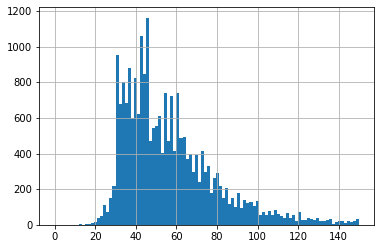

In [74]:
data['total_area'].hist(bins=100, range=(0, 150)) # строим гистограмму

Видим, что основная масса значений лежит в диапазоне 30 - 80 кв. м, что выглядит реалистично. График напоминает нормальное распределение.

*4.1.2 Жилая площадь*

In [75]:
data['living_area'].describe() # выводим характеристики столбца.

count    23541.000000
mean        34.608265
std         22.355032
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Среднее арифметическое - 34,6 кв. м, стандартное отклонение - 22,4 кв., минимальное значение - 2 кв. м, максимальное - 409 кв м, медиана - 30 кв м.
В целом цифры коррелируют со значениями общей площади.

<AxesSubplot:>

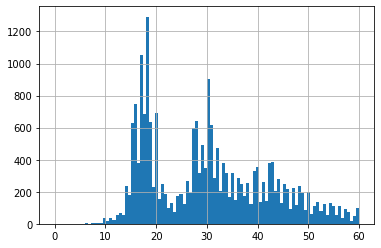

In [76]:
data['living_area'].hist(bins=100, range=(0, 60)) # строим гистограмму

Видим, что основная масса значений лежит в диапазоне 15 - 50 кв. м, что выглядит реалистично.
На графике можно отметить "провал" в районе площади 20-27 кв м - таких квартир очень мало в выборке.

*4.1.3 Площадь кухни*

In [77]:
data['kitchen_area'].describe() # выводим характеристики столбца.

count    23541.000000
mean        10.487921
std          6.017415
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Среднее арифметическое - 10,5 кв. м, стандартное отклонение - 6 кв., минимальное значение - 1,3 кв. м, максимальное - 112 кв м, медиана - 9 кв м.
В целом цифры коррелируют со значениями общей площади и жилой площади.

<AxesSubplot:>

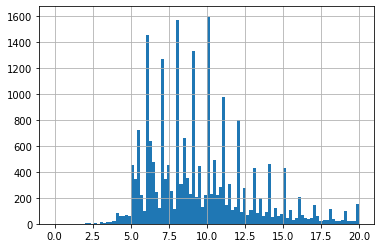

In [78]:
data['kitchen_area'].hist(bins=100, range=(0, 20)) # строим гистограмму

Видим, что основная масса значений лежит в диапазоне 6 - 15 кв. м, что выглядит реалистично.
Определенные значения площади кухни существенно более распространены (6, 8, 11 кв. м)

*4.1.4 Цена объекта*

In [79]:
data['last_price'].describe() # выводим характеристики столбца

count    2.354100e+04
mean     6.534986e+06
std      1.090128e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.632000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Самый дорогой объект в выборке стоит 763 млн руб., самый дешевый - 430 тыс. руб., медианное значение цены - чуть больше 4,6 млн руб., что ожидаемо, учитывая локацию. Среднее значение (6,5 млн руб.) больше медианного за счет "дорогих" выбросов.

<AxesSubplot:>

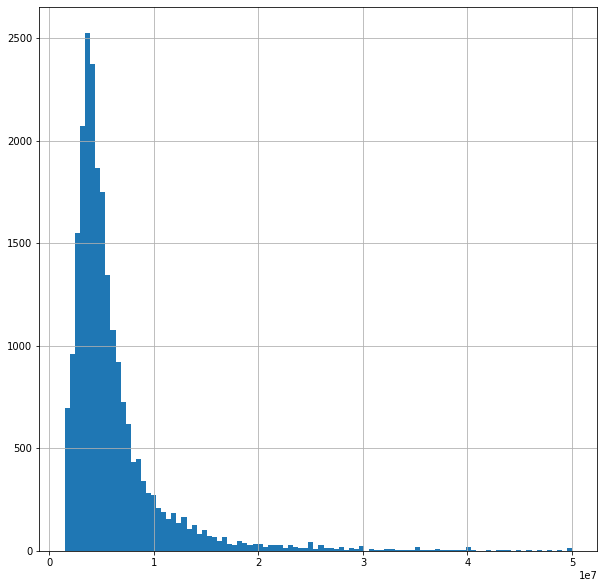

In [80]:
data['last_price'].hist(bins=100, range=(1500000, 50000000), figsize=(10,10)) # строим гистограмму

Гистограмма нечитабельна из-за длины чисел.

In [81]:
data['last_price_mln'] = data['last_price'] / 1000000 # для удобства создадим столбец с ценой в миллионах рублей

In [82]:
data['last_price_mln'] = data['last_price_mln'].round(1) # округлим

<AxesSubplot:>

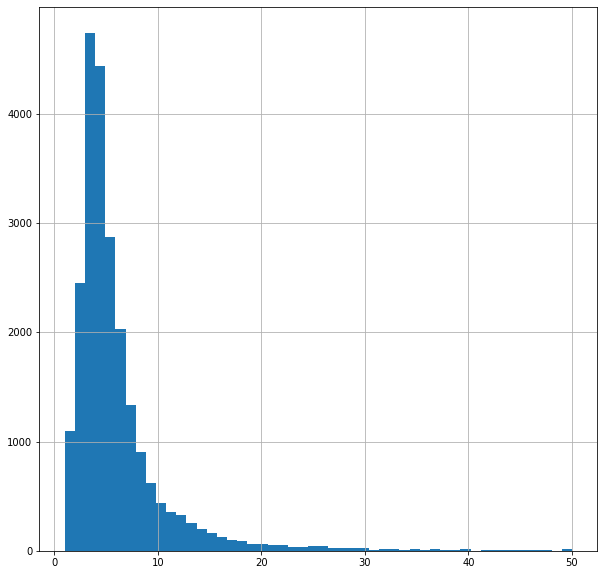

In [83]:
data['last_price_mln'].hist(bins=50, range=(1, 50), figsize=(10,10)) # строим гистограмму по ценам в миллионах рублей

Видим, что стоимость большинства квартир составляет около 5 млн руб.

*4.1.5 Количество комнат*

In [84]:
data['rooms'].describe() # выводим характеристики столбца.

count    23541.000000
mean         2.079308
std          1.066660
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Cреднее арифметическое - 2,1, стандартное отклонение - 1,1, минимальное значение - 1, максимальное - 19, медиана - 2, третий квартиль - 3.
В целом цифры ожидаемые (квартиры с количеством комнат больше 10 были рассмотрены выше)

<AxesSubplot:>

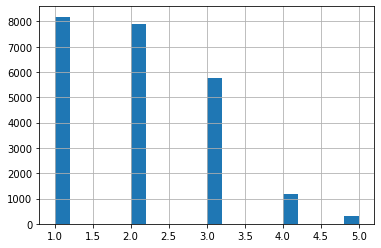

In [85]:
data['rooms'].hist(bins=20, range=(1, 5)) # строим гистограмму 

Видим, что основная масса квартир - однокомнатные и двухкомнатные, трехкомнатных квартир немного меньше, что выглядит реалистично.

*4.1.6 Высота потолков*

In [86]:
data['ceiling_height'].describe() # выводим характеристики столбца.

count    14462.000000
mean         2.727534
std          0.291141
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Среднее арифметическое - 2,7, стандартное отклонение - 0,3, минимальное значение - 2, максимальное - 8,3, медиана - 2,65, третий квартиль - 2,8. В целом цифры ожидаемые.

<AxesSubplot:>

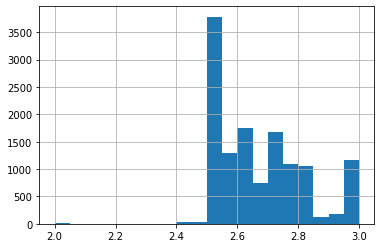

In [87]:
data['ceiling_height'].hist(bins=20, range=(2, 3)) # строим гистограмму

Видим, что основная масса квартир имеет высоту потолка 2,5 м и чуть больше, что выглядит реалистично. Вместе с тем, необходимо помнить, что в базе существенное количество строк (более 9 тыс.) имеют пропуски в столбце с высотой потолка.

*4.1.7 Этаж квартиры*

In [88]:
data['floor'].describe() #  выводим характеристики столбца.

count    23541.00000
mean         5.87834
std          4.87163
min          1.00000
25%          2.00000
50%          4.00000
75%          8.00000
max         33.00000
Name: floor, dtype: float64

Среднее арифметическое - 5,9, стандартное отклонение - 4,9, минимальное значение - 1, максимальное - 33, медиана - 4, третий квартиль - 8. В целом цифры ожидаемые.

<AxesSubplot:>

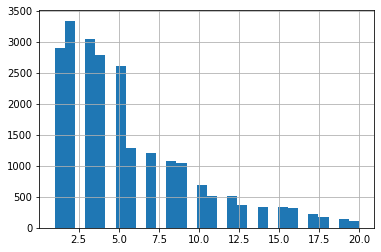

In [89]:
data['floor'].hist(bins=30, range=(1, 20)) # строим гистограмму

Видим, что квартиры в основном расположены на 1-5 этажах.

*4.1.8 Тип этажа квартиры*

In [90]:
data['type_floor'].value_counts()

другой       17309
последний     3326
первый        2906
Name: type_floor, dtype: int64

Видим, что 73,5% квартир располагаются не на первом и не на последнем этаже. Квартир на последнем этаже чуть больше, чем на первом.

<AxesSubplot:>

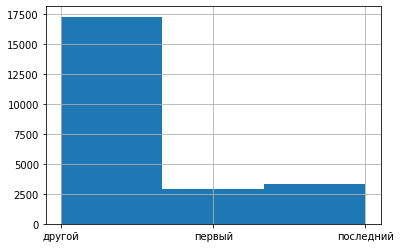

In [91]:
data['type_floor'].hist(bins=3) 

Гистограмма отражает вышеуказанные цифры.

*4.1.9 Общее количество этажей в доме*

In [92]:
data['floors_total'].describe() # выводим характеристики столбца.

count    23541.000000
mean        10.676394
std          6.593594
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Среднее арифметическое - 10,7, стандартное отклонение - 6,6, минимальное значение - 1, максимальное - 60, медиана - 9, третий квартиль - 16. В целом цифры ожидаемые.

<AxesSubplot:>

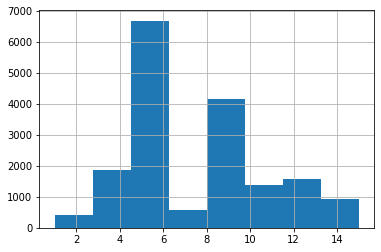

In [93]:
data['floors_total'].hist(bins=8, range=(1, 15)) 

График показывает, что пяти- и девятиэтажек больше всего (ожидаемо).

*4.1.10 Расстояние до центра города в метрах*

In [94]:
data['city_centers_nearest'].describe() # выводим характеристики столбца.

count    18041.000000
mean     14194.364891
std       8614.273570
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Среднее арифметическое - 14 194, стандартное отклонение - 8 614, минимальное значение - 181, максимальное - 65 968, медиана - 13 099, третий квартиль - 16 285. В основном квартиры расположены не в самом центре.

<AxesSubplot:>

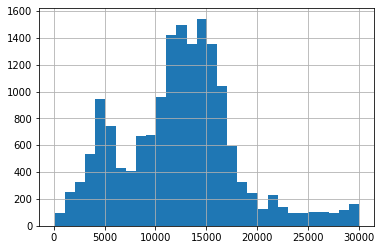

In [95]:
data['city_centers_nearest'].hist(bins=30, range=(100, 30000)) 

На гистограмме видим, что квартир в 5 км от центра больше, чем, например, 7-8 км. В основном квартиры расположены в 13-15 км от центра.

*4.1.11 Расстояние до ближайшего аэропорта*

In [96]:
data['airports_nearest'].describe() # выводим характеристики столбца

count    18018.000000
mean     28799.900877
std      12633.620244
min       6450.000000
25%      18559.000000
50%      26757.000000
75%      37282.250000
max      84869.000000
Name: airports_nearest, dtype: float64

Среднее арифметическое - 28 799, стандартное отклонение - 12 633, минимальное значение - 6 450, максимальное - 84 869, медиана - 26 757, третий квартиль - 37 282.
В основном квартиры расположены относительно далеко от аэропорта - в среднем 27-28 км (гораздо дальше, чем от центра города - аэропорт находится за городом).

<AxesSubplot:>

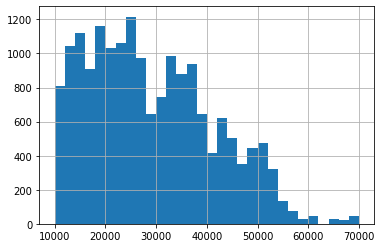

In [97]:
data['airports_nearest'].hist(bins=30, range=(10000, 70000)) 

На гистограмме видим, что квартиры в основном расположены примерно в 15-35 км от ближайшего аэропорта.

*4.1.12 Расстояние до ближайшего парка*

In [98]:
data['parks_nearest'].describe() # выводим характеристики столбца.

count    8020.000000
mean      490.381297
std       341.184855
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Среднее арифметическое - 490, стандартное отклонение - 341, минимальное значение - 1, максимальное - 3 190, медиана - 455, третий квартиль - 612.

<AxesSubplot:>

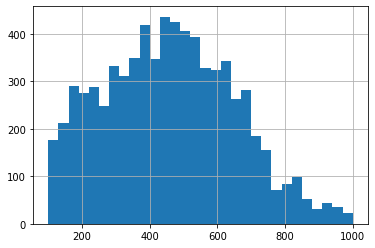

In [99]:
data['parks_nearest'].hist(bins=30, range=(100, 1000))

Судя по гистограмме, квартиры расположены гораздо ближе к паркам (400-600 м), чем к аэропорту/центру города, что ожидаемо.

*4.1.13 День и месяц публикации объявления*

In [100]:
data['weekday'].describe() # выводим характеристики столбца

count    23541.000000
mean         2.567351
std          1.788242
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

In [101]:
data['weekday'].value_counts() 

3    4272
1    4156
4    3977
2    3944
0    3594
5    1918
6    1680
Name: weekday, dtype: int64

Для удобства подсчитаем количество уникальных значений. Четверг - самый популярный день.

<AxesSubplot:>

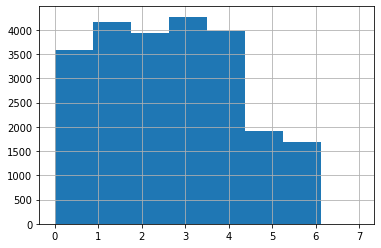

In [102]:
data['weekday'].hist(bins=8, range=(0, 7)) 

На графике видим, что объявления публиковались практически равномерно в будние дни, в выходные - гораздо реже, что ожидаемо и логично.

In [103]:
data['month'].value_counts() # для удобства подсчитаем количество уникальных значений месяца публикации объявления

2     2632
3     2574
11    2358
4     2355
10    2103
9     1970
6     1746
8     1738
7     1682
12    1638
1     1486
5     1259
Name: month, dtype: int64

Самый популярный месяц - февраль. В декабре, январе и мае меньше всего публикаций (в этимх месяцах много праздников, декабрь - предновогодний месяц). Летом публикаций также меньше (сезон отпусков).

<AxesSubplot:>

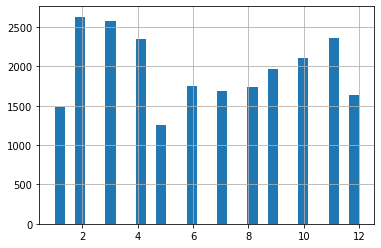

In [104]:
data['month'].hist(bins=30, range=(1, 12)) 

Гистограмма наглядно отражает вышеописанные особенности.

**Согласно результатам анализа, портрет среднестатистической квартиры таков:**
- однушка или двушка на 1-5 этаже пяти- или девятиэтажки (квартир на первом и последнем этажах меньше, чем на промежуточных);
- общая площадь около 45 кв. м;
- жилая площадь около 20 кв. м;
- площадь кухни около 6-10 кв. м;
- цена - около 4,5 млн руб.;
- потолок 2,5 м;
- квартира расположена относительно недалеко от парка (пол-километра), однако не в центре города и в отдалении от аэропорта.
Объявления в основном публикуются в будние дни, скорее не в летние и не в праздничные месяцы.

**4.2 Изучаем, как быстро продавались квартиры**

<AxesSubplot:>

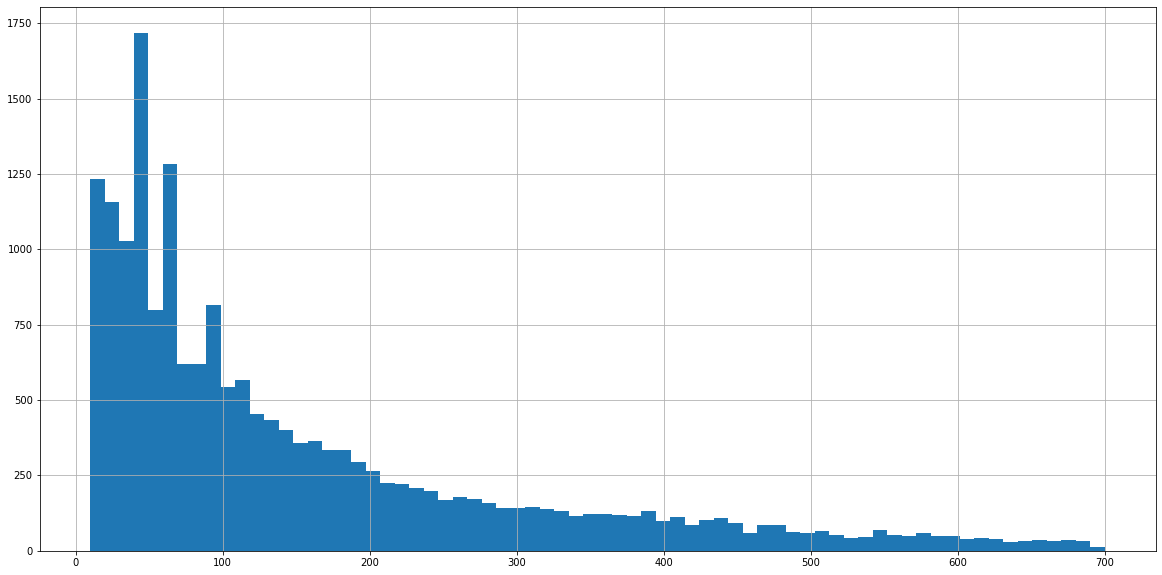

In [105]:
data['days_exposition'].hist(bins=70, range=(10, 700), figsize=(20,10)) # строим гистограмму.

Судя по графику, большое количество квартир продавалось через 40 и 60 дней. При этом основная масса - в срок, не превышающий 200 дней.

In [106]:
data['days_exposition'].mean().round() # считаем округленное среднее

181.0

In [107]:
data['days_exposition'].median() # считаем медиану

95.0

In [108]:
data['days_exposition'].describe() # еще можно таким способом

count    20373.000000
mean       180.759191
std        219.800226
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Исходя из вышеотраженных данных, продажа квартиры занимает в среднем около 6 месяцев (в большинстве случаев - 1-3,5 месяца). Быстрыми продажами можно считать сделки в пределах месяца. Необычно долгие продажи - после 8-9 месяцев.

**4.3  Определяем факторы, которые больше всего влияют на общую (полную) стоимость объекта**

*4.3.1 Корреляция цены и общей площади*

In [109]:
print(data['last_price_mln'].corr(data['total_area']))

0.6530669239531128


Корреляция (коэффициент Пирсона) 0.65 говорит о наличии связи, но не слишком сильной (используем цены в миллионах для удобства здесь и далее).

<AxesSubplot:xlabel='total_area', ylabel='last_price_mln'>

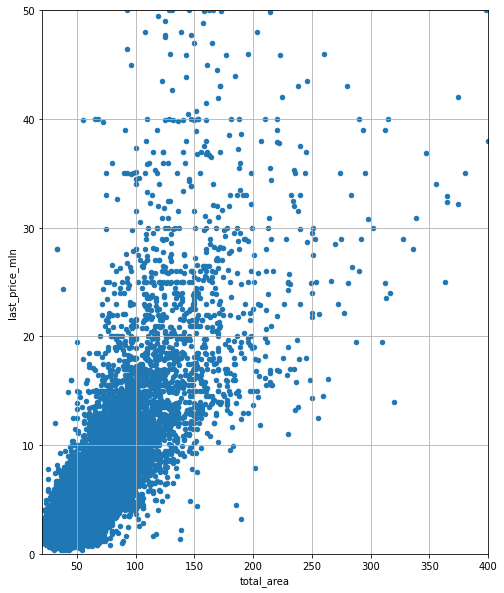

In [110]:
data.plot(x='total_area', y='last_price_mln', style='o', kind='scatter', xlim=(20, 400), ylim=(0, 50), grid=True, figsize=(8, 10))

На графике видим, что в выборке есть дорогие (дороже 20 млн руб.) квартиры как большой площади (более 200 кв м), так и относительно небольшие (100-150 кв м). Видим, что квартира стоимостью 40 млн руб, например, может быть площадью как 70 кв м, так и 300 кв м.

*4.3.2 Корреляция цены и жилой площади* 

In [111]:
print(data['last_price_mln'].corr(data['living_area']))

0.5858679256406577


Корреляция (коэффициент Пирсона) - 0,585 меньше, чем корреляция цены с общей площадью. Связь сохраняется, но она чуть менее прямая.

<AxesSubplot:xlabel='living_area', ylabel='last_price_mln'>

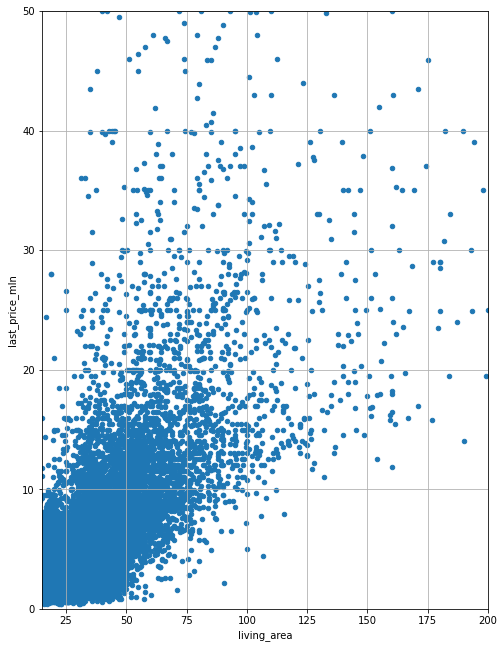

In [112]:
data.plot(x='living_area', y='last_price_mln', style='o', kind='scatter', xlim=(15, 200), ylim=(0, 50), grid=True, figsize=(8, 11))

График напоминает график соотношения общей площади и цены и выглядит логично на фоне более низкого коэффициента корреляции.
В выборке небольших дорогих квартир не меньше, чем больших.

*4.3.3 Корреляция цены и площади кухни*

In [113]:
print(data['last_price_mln'].corr(data['kitchen_area']))

0.5142806949648572


Корреляция (коэффициент Пирсона) еще меньше - 0.51. Площадь кухни является менее существенным фактором, нежели общая площадь и жилая площадь.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price_mln'>

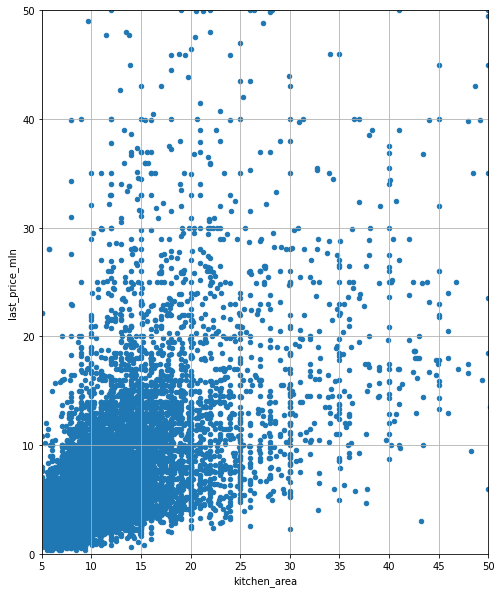

In [114]:
data.plot(x='kitchen_area', y='last_price_mln', style='o', kind='scatter', xlim=(5, 50), ylim=(0, 50), grid=True, figsize=(8, 10))

График напоминает графики соотношения общей/жилой площади и цены и выглядит логично на фоне еще более низкого коэффициента корреляции.
В выборке дорогих квартир с небольшой кухней не меньше, чем с большой.

*4.3.4 Корреляция цены и количества комнат*

In [115]:
print(data['rooms'].corr(data['last_price_mln']))

0.3657939390641267


Корреляция (коэффициент Пирсона) слабая -  само по себе большое количество комнат не сильно увеличивает стоимость.

In [116]:
data_pivot_r = data.pivot_table(index=['rooms'], values='last_price_mln', aggfunc=['count', 'median']) # создадим сводную таблицу
data_pivot_r

,count,median
,last_price_mln,last_price_mln
rooms,,
1,8186,3.60
2,7888,4.80
3,5777,6.20
4,1171,9.00
5,325,14.00
6,104,19.00
7,59,24.90
8,12,23.10


Видим, что 1-3 комнатные квартиры составляют основную часть выборки - при этом медианная цена ожидаемо растет с увеличением количества квартир.

<AxesSubplot:xlabel='rooms'>

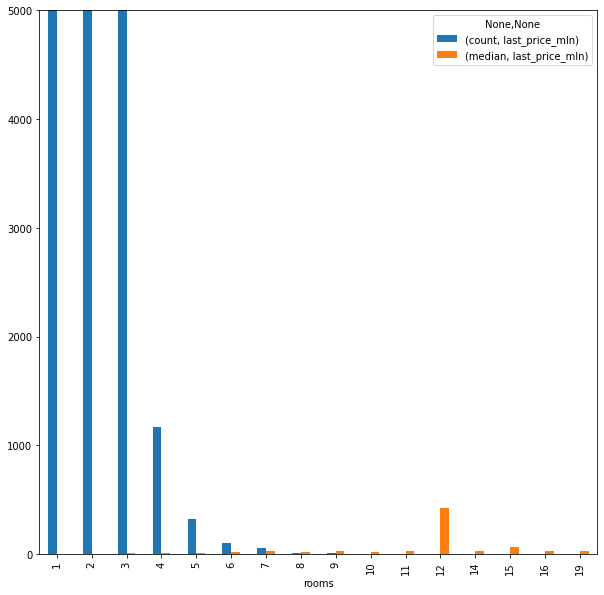

In [117]:
data_pivot_r.plot(kind='bar', ylim=(0, 5000), figsize=(10,10)) # строим диаграмму по данным сводной таблицы

Видим, что 1-3 комнатные квартиры составляют подавляющее большинство объектов. Медианная цена 12-комнатной квартиры выделяется за счет выброса (такая квартира в выборке всего одна). 

*4.3.5 Корреляция цены и этажа, на котором расположена квартира (первый, последний, другой)*

In [118]:
data_pivot_f = data.pivot_table(index=['type_floor'], values='last_price_mln', aggfunc=['median']) # создаем сводную таблицу
data_pivot_f

,median
,last_price_mln
type_floor,
другой,4.8
первый,3.9
последний,4.3


<AxesSubplot:xlabel='type_floor'>

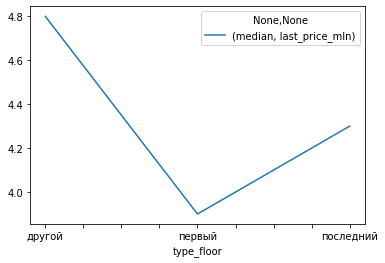

In [119]:
data_pivot_f.plot()

Медианная цена квартир, находящихся не на первом и не напоследнем этаже, выше на 10-20%. Квартиры на первом этаже в среднем дешевле квартир на последнем этаже, что ожидаемо.

*4.3.6 Корреляция цены и даты размещения (день недели, месяц, год)*

In [120]:
data_pivot_w = data.pivot_table(index=['weekday'], values='last_price_mln', aggfunc=['median']) # создаем сводную таблицу
data_pivot_w

,median
,last_price_mln
weekday,
0,4.6
1,4.7
2,4.7
3,4.6
4,4.6
5,4.6
6,4.5


In [121]:
data_pivot_w_1 = data.pivot_table(index=['weekday'], values='last_price_mln', aggfunc=['count'])
data_pivot_w_1

,count
,last_price_mln
weekday,
0,3594
1,4156
2,3944
3,4272
4,3977
5,1918
6,1680


<AxesSubplot:xlabel='weekday'>

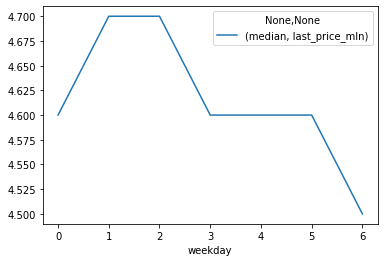

In [122]:
data_pivot_w.plot()

In [123]:
print(data['last_price_mln'].corr(data['weekday'])) 

0.0014770095399403217


Корреляции почти нет. Видим, что цена почти не зависит от дня недели, в который было размещено объявление (это логично).

In [124]:
data_pivot_m = data.pivot_table(index=['month'], values='last_price_mln', aggfunc=['median'])
data_pivot_m

,median
,last_price_mln
month,
1,4.6
2,4.6
3,4.6
4,4.8
5,4.5
6,4.4
7,4.6
8,4.6


In [125]:
print(data['last_price_mln'].corr(data['month'])) 

0.0023055838048455196


Корреляции почти нет

<AxesSubplot:xlabel='month'>

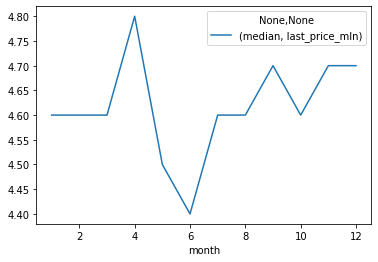

In [126]:
data_pivot_m.plot()

По итогам анализа видим, что корреляции цены и месяца нет - в середине года цена немного проседала, однако диапазон колебаний медианных значений невелик.

In [127]:
data_pivot_y = data.pivot_table(index=['year'], values='last_price_mln', aggfunc=['median'])
data_pivot_y

,median
,last_price_mln
year,
2014,7.65
2015,5.30
2016,4.50
2017,4.50
2018,4.60
2019,5.00


Медианная цена в 2014 году была подозрительно высокой относительно других лет. 2015 год выше остальных лет (кроме 2014).

<AxesSubplot:xlabel='year'>

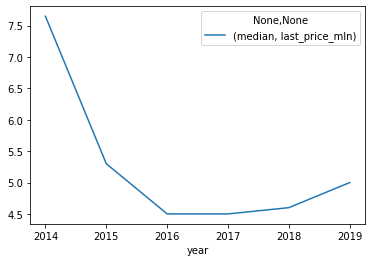

In [140]:
data_pivot_y.plot()

In [129]:
data_pivot_y_1 = data.pivot_table(index=['year'], values='last_price_mln', aggfunc=['count'])
data_pivot_y_1

,count
,last_price_mln
year,
2014,136
2015,1165
2016,2745
2017,8149
2018,8478
2019,2868


<AxesSubplot:xlabel='year'>

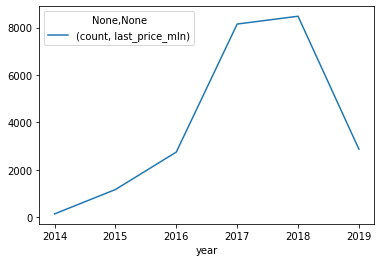

In [142]:
data_pivot_y_1.plot()

Видим, что данные за 2014-2015 не показательны (особенно за 2014 год) - выборка объявлений очень маленькая.
Медианная цена в 2016-2019 году (наибольшее количество объявлений) существенно не отличалась, лишь в 2019 году стала немного больше (возможно, из-за инфляции).
Таким образом, сформировать однозначный вывод о существенной зависимости цены от года не представляется возможным.
Однако, указанное обусловлено относительно коротким временным промежутком (2014-2019 гг.).
Вероятно, на более длинной дистанции корреляция была бы более очевидной.

В целом, если говорить о наиболее существенных факторах, влияющих на цену, из отраженных в задании, это общая площадь и жилая площадь квартиры. Большее количество комнат, большая площадь кухни и нахождение не на первом/последнем этаже также увеличивает стоимость, но не так линейно.
Возможно предположить, что существенное влияние на стоимость также оказывает близость к центру города, год постройки дома (отсутствует в базе) и неколичественные параметры (престижность района и уровень его инфраструктурной развитости, класс и состояние жилого комплекса/дома, качество отделки/ремонта квартиры).

**4.4 Определяем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [130]:
data['locality_name'].value_counts().head(10) # определим 10 населенных пунктов с наибольшим числом объявлений.

Санкт-Петербург      15630
поселок Мурино         552
поселок Шушары         438
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Санкт-Петербург ожидаемо лидирует с большим отрывом.

In [131]:
top_10 = data.query('locality_name in ["Санкт-Петербург", "поселок Мурино", "поселок Шушары", "Всеволожск", "Пушкин", "Колпино", "поселок Парголово", "Гатчина", "деревня Кудрово", "Выборг"]')
# сделаем срез из основной базы данных

In [143]:
avg_meter = top_10['meter_price'].mean().round() # найдем среднее значение и округлим
avg_meter

108972.0

Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений - 108 972 рубля.

In [133]:
top_10_meter = top_10.pivot_table(index=['locality_name'], values='meter_price', aggfunc=['mean']) # строим сводную таблицу
top_10_meter.columns = ['avg_meter_price']
top_10_meter['avg_meter_price'] = top_10_meter['avg_meter_price'].round()
top_10_meter.sort_values(by='avg_meter_price', ascending=False)

,avg_meter_price
locality_name,
Санкт-Петербург,114808.0
Пушкин,103126.0
деревня Кудрово,92474.0
поселок Парголово,90176.0
поселок Мурино,85630.0
поселок Шушары,78577.0
Колпино,75425.0
Гатчина,68746.0
Всеволожск,68654.0


С помощью сводной таблицы определяем среднюю стоимость квадратного метра по населенным пунктам, затем сортируем данные.
Населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург (114 808 руб.), самой низкой - Выборг (58 142 руб.).
Предположительно, данный факт обусловлен тем, что Выборг - самый отдаленный от Санкт-Петербурга населенный пункт в выборке.

**4.5 Анализируем изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра**

In [134]:
spb = data.loc[data['locality_name'] == 'Санкт-Петербург'] # отберем квартиры, расположенные в Санкт-Петербурге

In [135]:
spb_km = spb.pivot_table(index=['centre_km'], values='meter_price', aggfunc=['mean']) # вычисляем среднюю цену метра на каждый километр удаленности от центра Санкт-Петербурга
spb_km.columns = ['avg_meter_price_centre'] # переименовываем столбец
spb_km['avg_meter_price_centre'] = spb_km['avg_meter_price_centre'].round() # округляем значения
spb_km # выводим на экран

,avg_meter_price_centre
centre_km,
0.0,245834.0
1.0,177327.0
2.0,157849.0
3.0,121508.0
4.0,133283.0
5.0,140424.0
6.0,150489.0
7.0,156258.0
8.0,124740.0


<AxesSubplot:xlabel='centre_km'>

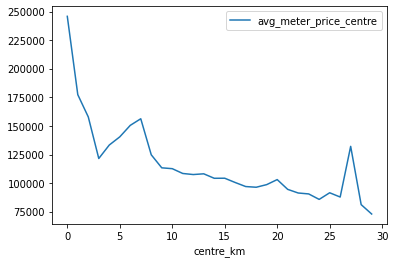

In [136]:
spb_km.plot() # строим график

График в целом отражает обратную зависимость расстояния от центра города и стоимости квадратного метра.
Вместе с тем, по отдельным "километрам" наблюдаются скачки стоимости, обусловленные присутствием на данном расстоянии объектов, превосходящих по иным характеристикам более близкие к центру объекты.
Так, например, в 27 км от центра цена составляет 132,1 тыс. руб. - больше, чем в 8 км от центра.
Стоимость квадратного метра по мере отдаления от центра меняется нелинейно - где-то шаг составляет 20-30 тыс. руб., в иных случаях - 3-5 тыс. руб.

In [137]:
spb_km_1 = spb.pivot_table(index=['centre_km'], values='meter_price', aggfunc=['count'])
spb_km_1 # выведем распределение количества объектов по километрам, полученное с помощью сводной таблицы

,count
,meter_price
centre_km,
0.0,27
1.0,191
2.0,310
3.0,348
4.0,688
5.0,914
6.0,614
7.0,419


Мы видим, что выборка не симметрична - объектов ближе 10 км и дальше 19 км от центра относительно немного, в связи с чем средние данные по ним могут быть искажены под влиянием иных параметров (например, 20 и 27 км).

### Общий вывод

В ходе выполнения проекта было проведено исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача анализа — установить параметры для определения рыночной стоимости в целях последующего построения автоматизированной системы. 

*В процессе работы*:
- были выявлены и удалены/заполнены пропущенные значения;
- изменены типы данных в некоторых столбцах;
- устранены неявные дубликаты в названиях населенных пунктов, а также аномальные значения в отдельных столбцах;
- в таблицу добавлены дополнительные расчетные показатели.
В целом можно отметить, что предобработка данных **существенным образом выборку не изменила** (удалено менее 1% записей), при этом ряд оставшихся **пропусков** (столбцы с расстоянием до центра города, ближайшего парка, аэропорта, водоема) не исказил результаты анализа (причина данных пропусков носит технический характер, кроме того, возможно в электронном справочнике по ряду населенных пунктов просто отсутствует точка центра города, не все парки и водоемы отмечены). Также пропуски **остались** в столбце с высотой потолка (учитывая их существенную долю от общего количества (около 40% или более 9 тыс.), соответствующей замены не нашлось).

*По итогам анализа установлено следующее*:
1. **Портрет среднестатистической квартиры таков**:
- однушка или двушка на 1-5 этаже пяти- или девятиэтажки (квартир на первом и последнем этажах меньше, чем на промежуточных);
- общая площадь около 45 кв. м;
- жилая площадь около 20 кв. м;
- площадь кухни около 6-10 кв. м;
- цена - около 4,5 млн руб.;
- высота потолка - около 2,5 м;
- квартира расположена в Санкт-Петербурге относительно недалеко от парка (400-600 м), однако явно не в центре города (в 13-15 км) и в отдалении от аэропорта (15-35 км).
Объявления в основном публикуются в будние дни, скорее не в летние и не в праздничные месяцы.

2. Продажа квартиры занимает **в большинстве случаев** 1-3,5 месяца. **Быстрыми** продажами можно считать сделки в пределах месяца. **Необычно долгие продажи** - после 8-9 месяцев.

3. Если говорить о **наиболее существенных факторах**, влияющих на цену, из отраженных в задании, это:
- **общая площадь и жилая площадь квартиры**. Корреляция - 0,65 и 0,585, соответственно;
- **большее количество комнат** (корреляция с ценой - 0,37), **большая площадь кухни** (корреляция с ценой - 0,51) и **нахождение не на первом/последнем этаже** (в меньшей степени) также увеличивает стоимость, но не так линейно (возможно, для установления более четкой корреляции необходим анализ по более симметричной выборке).

Возможно предположить, что **существенное влияние** на стоимость также оказывает год постройки дома (отсутствует в базе) и неколичественные параметры (престижность района и уровень его инфраструктурной развитости, класс и состояние жилого комплекса/дома, качество отделки/ремонта квартиры), также отсутствующие в базе данных.

4. **Близость к центру Санкт-Петербурга** в целом **положительно коррелирует** со стоимостью квартиры - стоимость квадратного метра по мере отдаления от центра снижается нелинейно - где-то шаг на 1 км составляет 20-30 тыс. руб., в иных случаях - 3-5 тыс. руб. (вместе с тем выборка **не в полной мере симметрична** - квартир близко к центру и совсем далеко от центра относительно немного). Кроме того, предположительно **расстояние иных населенных пунктов до Санкт-Петербурга** также имеет значение - например, в Выборге (находится дальше всех из числа наиболее популярных населенных пунктов) в среднем **самые дешевые квартиры** (58,1 тыс. руб. за 1 кв. м), **самые дорогие** - в Санкт-Петербурге - 114,8 тыс. руб. за 1 кв. м (вместе с тем, по данному вопросу целесообразно провести дополнительное исследование - возможно, дело не только в отдаленности от Санкт-Петербурга, но и в иных сопутствующих факторах (старый жилой фонд, неразвитая инфраструктура и т.д.)).

5. **Целесообразно** добавить в базу сведения о годе постройки дома и включить их в анализ - на мой взгляд, этот фактор мог бы стать одним из ключевых в части влияния на цену квартиры.
Кроме того, существенное влияние на стоимость могут оказывать вышеотмеченные качественные показатели, **отсутствующие в базе** (как минимум могли бы объяснить ряд выявленных фактов/тенденций).